In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [145]:
test_df = pd.read_csv('../data/classification/data.simple.test.1000.csv')
train_df = pd.read_csv('../data/classification/data.simple.train.1000.csv')
train_df['cls'] = train_df['cls'] - 1.0
test_df['cls'] = test_df['cls'] - 1.0


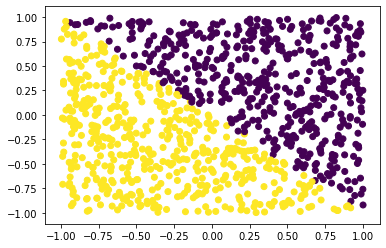

In [146]:
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'])
plt.show()

In [147]:
def split_dataset(train_df: pd.DataFrame, 
                  fraction: float = 0.2):
    fraction = 0.2
    split_index = int(fraction*len(train_df))
    valid_df = train_df.iloc[:split_index]
    train_df = train_df.iloc[split_index:]
    return train_df, valid_df

In [148]:
def train_net( net: Network,
               dataset: pd.DataFrame,
               max_epochs: int,
               learning_rate: float,
               batch_size: int = 1):
    
    
    train_df, valid_df = split_dataset(dataset, 0.2)

    train_losses = []
    validation_losses = []
    for epoch in range(max_epochs):
        #avg_train_loss = 0
        #avg_validation_loss = 0
        for i in range(0, len(train_df), batch_size):
            x = np.array(train_df.iloc[i:i+batch_size, :-1])
            y = np.reshape(np.array(train_df.iloc[i:i+batch_size, -1]), (x.shape[0], 1))
            avg_train_loss = net.fit(x, y, learning_rate, x.shape[0])

        for i in range(0, len(train_df), batch_size):
            x = np.array(train_df.iloc[i:i+batch_size, :-1])
            y = np.reshape(np.array(train_df.iloc[i:i+batch_size, -1]), (x.shape[0],1))
            avg_validation_loss = net.validate(x, y, learning_rate, x.shape[0])

        avg_train_loss /= len(train_df)
        avg_validation_loss /= len(valid_df)

        train_losses.append(avg_train_loss)
        validation_losses.append(avg_validation_loss)
    return train_losses, validation_losses


In [149]:
from src.sigmoid_activation import SigmoidActivation
from src.linear_activation import LinearActivation
from src.network import Network
from src.log_error import LogError

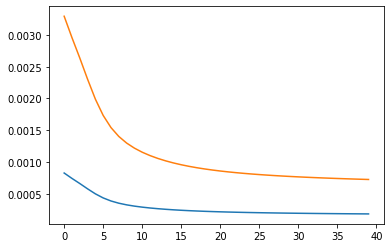

In [153]:
input_size = 2
output_size = 1
batch_size = 5
eps_decimal = 4
seed = 1

layers = [(10, LinearActivation(), True),
              (output_size, SigmoidActivation(), True)]
network = Network(input_size, layers, LogError(), seed)



train_losses, validation_losses = train_net(network, train_df, 40, 0.01, 5)

plt.plot(train_losses)
plt.plot(validation_losses)
plt.show()
#for i in range(100):
#    avg_loss = 0
#    for _, row in train_df.iterrows():
 #       
  #      x0, x1, y = row
   #     X = np.array([[x0, x1]])
    #    Y = np.array([[y]])
    #    print(X.shape, Y.shape)
#
#        loss = network.fit(X, Y, 0.01, 1)
#        avg_loss += loss
#    print(avg_loss/len(train_df))



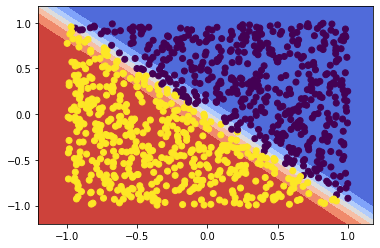

In [154]:
# X - some data in 2dimensional np.array
h = .02
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.zeros(xx.ravel().shape)
for i, (x, y) in enumerate(zip(xx.ravel(), yy.ravel())):
    z = network.predict(np.array([[x, y]]))
    #Z[i] = 0 if z < 0.5 else 1
    Z[i] = z
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
#plt.axis('off')
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'], cmap=plt.cm.viridis)